# **1. IMPORTING LIBRARIES AND DATASET**

In [ ]:
# To automatically calculate runtime of individual code block
!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.9 MB/s eta 0:00:00
time: 3.42 ms (started: 2023-05-10 00:55:49 +00:00)


In [ ]:
# Impotinging datetime library to calculate runtime of entire code/file
from datetime import datetime
start_time = datetime.now()

# Importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing ML libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# Importing PCA libraries
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.manifold import MDS

#Importing other needed libraries
import requests
import warnings
warnings.filterwarnings("ignore")

time: 3.3 s (started: 2023-05-10 00:55:49 +00:00)


# **2. Downloading Kuzushiji-MNIST Dataset**

> While running the code, chose 1 and then 2 to dowload .npz file for Kuzushiji-MNIST





In [ ]:
# Dowloading Kuzushiji-MNIST Dataset - code copied from "https://github.com/rois-codh/kmnist/blob/master/README.md"

try:
    from tqdm import tqdm
except ImportError:
    tqdm = lambda x, total, unit: x  # If tqdm doesn't exist, replace it with a function that does nothing
    print('**** Could not import tqdm. Please install tqdm for download progressbars! (pip install tqdm) ****')

# Python2 compatibility
try:
    input = raw_input
except NameError:
    pass

download_dict = {
    '1) Kuzushiji-MNIST (10 classes, 28x28, 70k examples)': {
        '1) MNIST data format (ubyte.gz)':
            ['http://codh.rois.ac.jp/kmnist/dataset/kmnist/train-images-idx3-ubyte.gz',
            'http://codh.rois.ac.jp/kmnist/dataset/kmnist/train-labels-idx1-ubyte.gz',
            'http://codh.rois.ac.jp/kmnist/dataset/kmnist/t10k-images-idx3-ubyte.gz',
            'http://codh.rois.ac.jp/kmnist/dataset/kmnist/t10k-labels-idx1-ubyte.gz'],
        '2) NumPy data format (.npz)':
            ['http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-train-imgs.npz',
            'http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-train-labels.npz',
            'http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-test-imgs.npz',
            'http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-test-labels.npz'],
    },
    '2) Kuzushiji-49 (49 classes, 28x28, 270k examples)': {
        '1) NumPy data format (.npz)':
            ['http://codh.rois.ac.jp/kmnist/dataset/k49/k49-train-imgs.npz',
            'http://codh.rois.ac.jp/kmnist/dataset/k49/k49-train-labels.npz',
            'http://codh.rois.ac.jp/kmnist/dataset/k49/k49-test-imgs.npz',
            'http://codh.rois.ac.jp/kmnist/dataset/k49/k49-test-labels.npz'],
    },
    '3) Kuzushiji-Kanji (3832 classes, 64x64, 140k examples)': {
        '1) Folders of images (.tar)':
            ['http://codh.rois.ac.jp/kmnist/dataset/kkanji/kkanji.tar'],
    }

}

# Download a list of files
def download_list(url_list):
    for url in url_list:
        path = url.split('/')[-1]
        r = requests.get(url, stream=True)
        with open(path, 'wb') as f:
            total_length = int(r.headers.get('content-length'))
            print('Downloading {} - {:.1f} MB'.format(path, (total_length / 1024000)))

            for chunk in tqdm(r.iter_content(chunk_size=1024), total=int(total_length / 1024) + 1, unit="KB"):
                if chunk:
                    f.write(chunk)
    print('All dataset files downloaded!')

# Ask the user about which path to take down the dict
def traverse_dict(d):
    print('Please select a download option:')
    keys = sorted(d.keys())  # Print download options
    for key in keys:
        print(key)

    userinput = input('> ').strip()

    try:
        selection = int(userinput) - 1
    except ValueError:
        print('Your selection was not valid')
        traverse_dict(d)  # Try again if input was not valid
        return

    selected = keys[selection]

    next_level = d[selected]
    if isinstance(next_level, list):  # If we've hit a list of downloads, download that list
        download_list(next_level)
    else:
        traverse_dict(next_level)     # Otherwise, repeat with the next level

traverse_dict(download_dict)

Please select a download option:
1) Kuzushiji-MNIST (10 classes, 28x28, 70k examples)
2) Kuzushiji-49 (49 classes, 28x28, 270k examples)
3) Kuzushiji-Kanji (3832 classes, 64x64, 140k examples)
> 1
Please select a download option:
1) MNIST data format (ubyte.gz)
2) NumPy data format (.npz)
> 2


100%|██████████| 17954/17954 [00:13<00:00, 1374.21KB/s]


100%|██████████| 30/30 [00:00<00:00, 226.91KB/s]


100%|██████████| 3008/3008 [00:03<00:00, 970.30KB/s] 


100%|██████████| 6/6 [00:00<00:00, 11310.48KB/s]

All dataset files downloaded!
time: 20.9 s (started: 2023-05-10 00:55:53 +00:00)


# **3. WRANGLING THE DOWNLOADED DATA TO MAKE IT USEABLE**

In [ ]:
# Loading the downloaded dataset
trd = np.load('kmnist-train-imgs.npz')
trl = np.load('kmnist-train-labels.npz')
tsd = np.load('kmnist-test-imgs.npz')
tsl = np.load('kmnist-test-labels.npz')

# Extracting data from dataset
for key, value in trd.items():
  trd = value

for key, value in trl.items():
  trl = value

for key, value in tsd.items():
  tsd = value

for key, value in tsl.items():
  tsl = value

# Converting 3d array to 2d dataframe
trd = pd.DataFrame(trd.reshape(trd.shape[0], -1))
trl = pd.DataFrame(trl)
tsd = pd.DataFrame(tsd.reshape(tsd.shape[0], -1))
tsl = pd.DataFrame(tsl)

# Combining train and test data and lables
X = pd.concat([trd,tsd])
y = pd.concat([trl,tsl])
y = y.set_axis(['Labels'], axis=1, inplace=False)

# Creating the final dataset
data = pd.concat([y,X],axis=1)

time: 1.62 s (started: 2023-05-10 00:56:14 +00:00)


# **4. Creating Smaller Dataset for PCA, KernelPCA, MDS fitting**

In [ ]:
# Sorting dataset according to classes
a1 = data.iloc[np.where(data['Labels'] == 1)]
a2 = data.iloc[np.where(data['Labels'] == 2)]
a3 = data.iloc[np.where(data['Labels'] == 3)]
a4 = data.iloc[np.where(data['Labels'] == 4)]
a5 = data.iloc[np.where(data['Labels'] == 5)]
a6 = data.iloc[np.where(data['Labels'] == 6)]
a7 = data.iloc[np.where(data['Labels'] == 7)]
a8 = data.iloc[np.where(data['Labels'] == 8)]
a9 = data.iloc[np.where(data['Labels'] == 9)]
a0 = data.iloc[np.where(data['Labels'] == 0)]

# Concatinating sorted data - 100 instances from each class
data_sorted = pd.concat([a1.iloc[0:100],a2.iloc[0:100],a3.iloc[0:100],a4.iloc[0:100],a5.iloc[0:100],a6.iloc[0:100],a7.iloc[0:100],a8.iloc[0:100],a9.iloc[0:100],a0.iloc[0:100]],axis=0)
X_s= data_sorted.iloc[:,1:785]
y_s= data_sorted.iloc[:,0]

time: 2.16 s (started: 2023-05-10 00:56:15 +00:00)


# **5. Plotting instances of Raw Dataset**

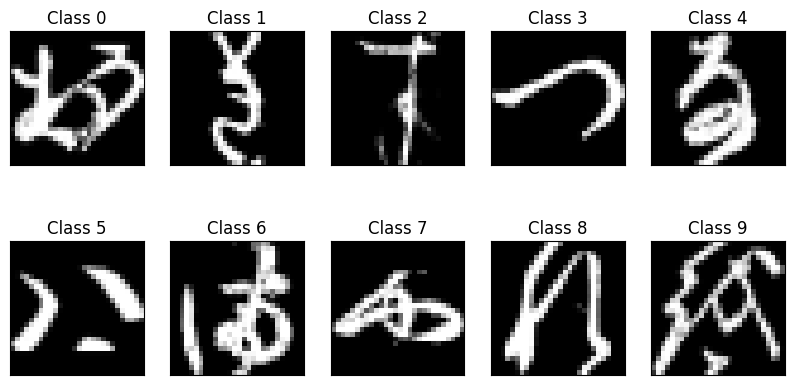

time: 2.98 s (started: 2023-05-10 00:56:18 +00:00)


In [ ]:
# Ploting an instance(imaage) of each class from the original raw dataset
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(10,5))
for label in range(10):
    indices = np.where(y == label)[0]
    image = np.array(X.iloc[indices[0]]).reshape(28, 28)
    ax = axs[label//5][label%5]
    ax.imshow(image, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('Class ' + str(label))
plt.show()

# **6. Performing PCA**

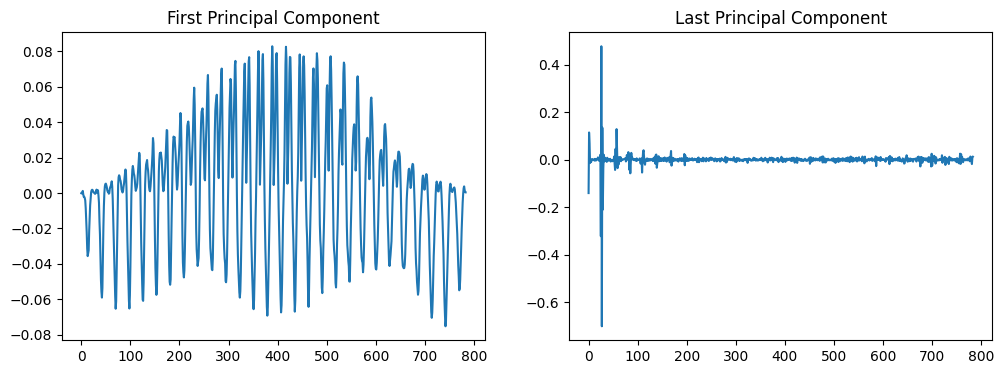

time: 15.3 s (started: 2023-05-10 00:56:21 +00:00)


In [ ]:
# Defining p_c_a() function for PCA fitting and tranformation
def p_c_a(X_s,y_s,no_of_components,t_o_f=True):

  # Performing PCA on the dataset
  pca = PCA(n_components=no_of_components)

  # Fitting the smaller dataset
  pca.fit(X_s)

  # Transforming the the original dataset
  X_pca = pca.transform(X)

  if t_o_f:
    # Computing the principal components
    principal_components = pca.components_

    # Ploting the first and last principal components
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    ax1.plot(principal_components[0])
    ax1.set_title('First Principal Component')
    ax2.plot(principal_components[-1])
    ax2.set_title('Last Principal Component')
    plt.show()

  # Returning Fitted Model and Transformed Data
  return pca,X_pca

# Calling p_c_a() function with n_components=784
pca,X_pca = p_c_a(X_s,y_s,784)

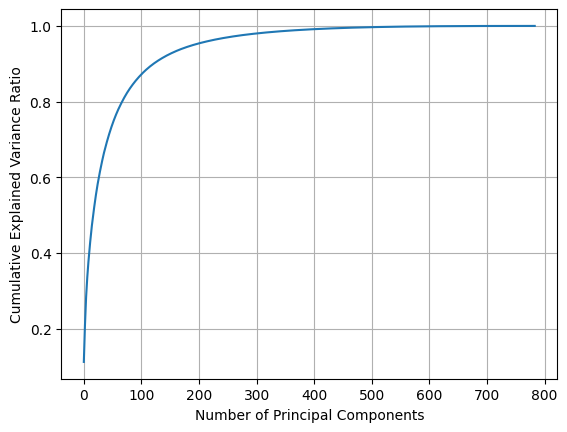

time: 975 ms (started: 2023-05-10 00:56:36 +00:00)


In [ ]:
# Plotting Cumulative Explained principal components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid()
plt.show()

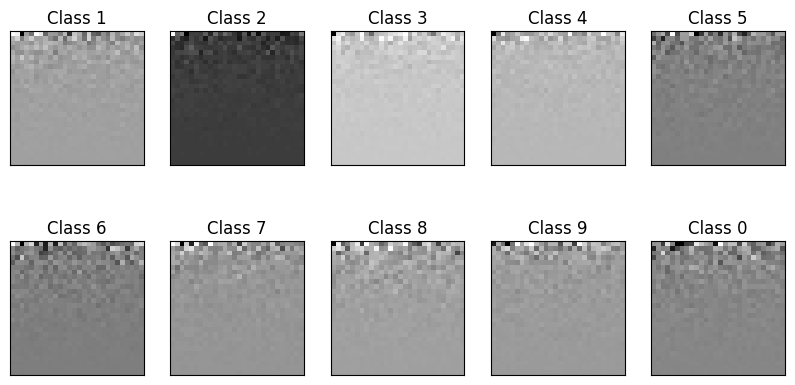

time: 2.09 s (started: 2023-05-10 00:56:37 +00:00)


In [ ]:
# Ploting the first image of each class
i=[1,2,3,4,5,6,7,8,9,0]
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(10,5))
for label in range(10):
    label_index = np.where(y_s == i[label])[0]
    image = X_pca[label_index[0], :].reshape(28, 28)
    ax = axs[label//5][label%5]
    ax.imshow(image, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'Class {i[label]}')
plt.show()

# **7. Performing Kernel PCA**

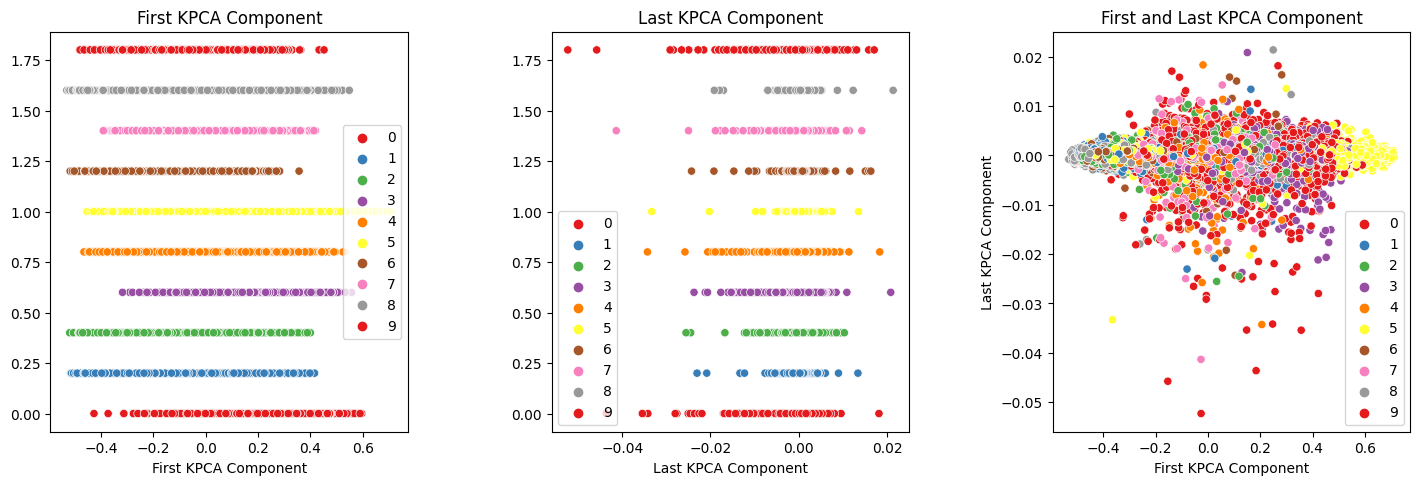

time: 28.5 s (started: 2023-05-10 00:56:39 +00:00)


In [ ]:
# Defining p_c_a() function for Kernel PCA fitting and tranformation
def kernel_pca(X_s,y_s,no_of_components,t_o_f=True):

  # Defining the KPCA model
  kpca = KernelPCA(n_components=no_of_components, kernel='cosine')

  # Fitting smaller dataset
  kpca = kpca.fit(X_s)

  # Transforming the original dataset
  X_kpca = kpca.transform(X)

  #Initialise t_o_f as False while calling the function if you don't want to plot the components
  if t_o_f:

    # Plotting the first principal component
    plt.figure(figsize=(17,5))
    plt.subplot(1, 3, 1)
    sns.scatterplot(x=X_kpca[:, 0], y=np.array(y.iloc[:,0])*0.2,hue=np.array(y.iloc[:,0]),palette='Set1')
    plt.xlabel('First KPCA Component')
    plt.title('First KPCA Component')

    # Plotting the last principal component
    plt.subplot(1, 3, 2)
    sns.scatterplot(x=X_kpca[:, -1], y=np.array(y.iloc[:,-1])*0.2,hue=np.array(y.iloc[:,0]),palette='Set1')
    plt.xlabel('Last KPCA Component')
    plt.title('Last KPCA Component')

    # Plotting the both principal component
    plt.subplot(1, 3, 3)
    sns.scatterplot(x=X_kpca[:, 0], y=X_kpca[:, -1],hue=np.array(y.iloc[:,0]),palette='Set1')
    plt.xlabel('First KPCA Component')
    plt.ylabel('Last KPCA Component')
    plt.title('First and Last KPCA Component')

    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
    plt.show()

  # Returning Fitted Model and Transformed Data
  return kpca,X_kpca

# Calling kernel_pca() function with n_components=784
kpca,X_kpca = kernel_pca(X_s,y_s,784)

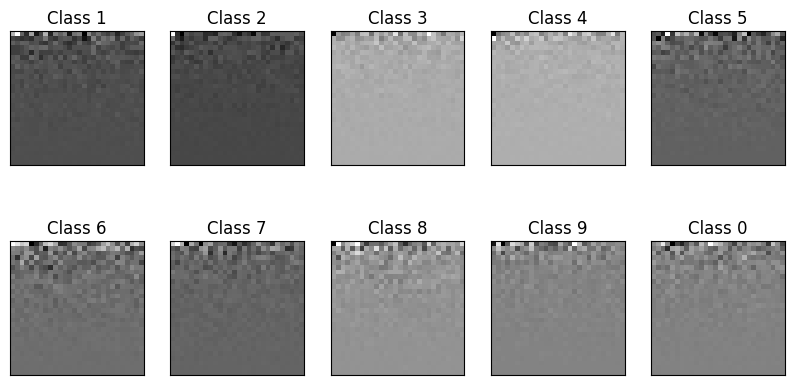

time: 584 ms (started: 2023-05-10 00:57:08 +00:00)


In [ ]:
# Ploting the first image of each class
i=[1,2,3,4,5,6,7,8,9,0]
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(10,5))
for label in range(10):
    label_index = np.where(y_s == i[label])[0]
    image = X_kpca[label_index[0], :].reshape(28, 28)
    ax = axs[label//5][label%5]
    ax.imshow(image, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'Class {i[label]}')
plt.show()

# **8. PERFORMING MULTIDIMENTIONAL SCALING**

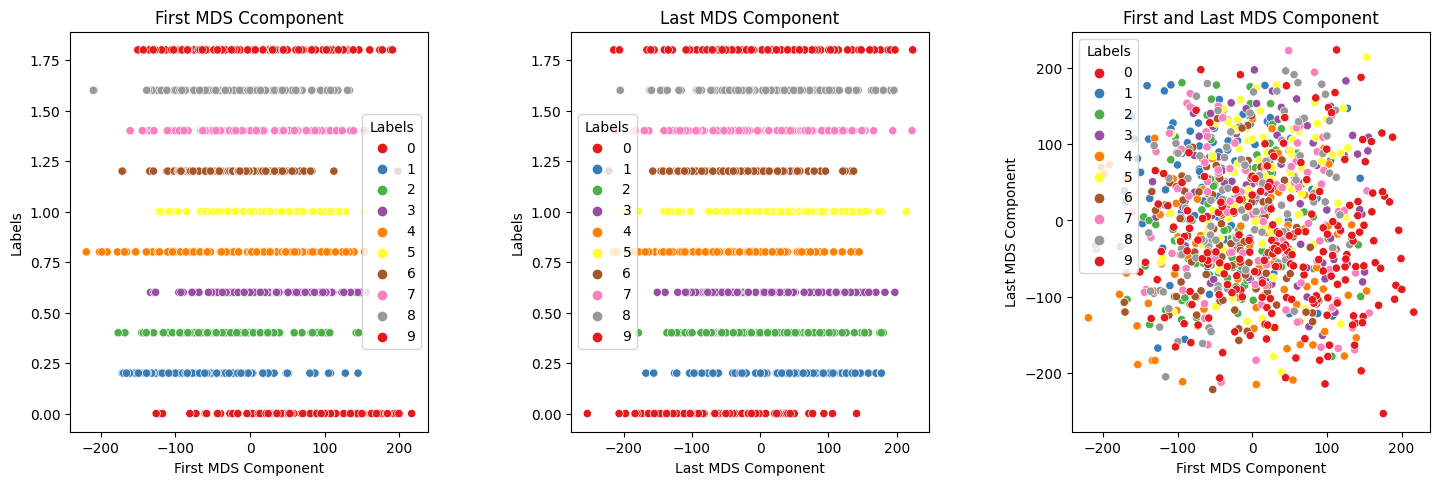

time: 2min 47s (started: 2023-05-09 08:51:01 +00:00)


In [ ]:
# Defining m_d_s() function for MDA fitting and transformation
def m_d_s(X_s,y_s,no_of_components,t_o_f=True):

  # Defining the MDS model
  mds = MDS(n_components=no_of_components, metric=True, random_state=2)

  # Fitting and transforming the smaller dataset
  X_mds = mds.fit_transform(X_s)

  #Initialise t_o_f as False while calling the function if you don't want to plot the components
  if t_o_f:

    # Plotting the first principal component
    plt.figure(figsize=(17,5))
    plt.subplot(1, 3, 1)
    sns.scatterplot(x=X_mds[:, 0], y=y_s*0.2,hue=y_s,palette='Set1')
    plt.xlabel('First MDS Component')
    plt.title('First MDS Ccomponent')

    # Plot the last principal component
    plt.subplot(1, 3, 2)
    sns.scatterplot(x=X_mds[:, -1], y=y_s*0.2,hue=y_s,palette='Set1')
    plt.xlabel('Last MDS Component')
    plt.title('Last MDS Component')

    # Plot the both principal component
    plt.subplot(1, 3, 3)
    sns.scatterplot(x=X_mds[:, 0], y=X_mds[:, -1],hue=y_s,palette='Set1')
    plt.xlabel('First MDS Component')
    plt.ylabel('Last MDS Component')
    plt.title('First and Last MDS Component')

    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
    plt.show()

  #  Returning Tranformed Data
  return X_mds

# Calling m_d_s() function with n_components=784
X_mds= m_d_s(X_s,y_s,784)

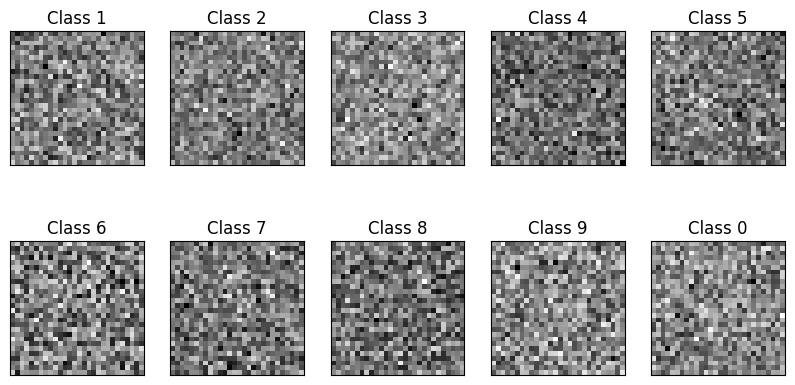

time: 611 ms (started: 2023-05-09 08:53:49 +00:00)


In [ ]:
# Ploting the first image of each class
i=[1,2,3,4,5,6,7,8,9,0]
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(10,5))
for label in range(10):
    label_index = np.where(y_s == i[label])[0]
    image = X_mds[label_index[0], :].reshape(28, 28)
    ax = axs[label//5][label%5]
    ax.imshow(image, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'Class {i[label]}')
plt.show()

# **9. CREATING FUNCTIONS FOR MULTIPLE USE/CALLINGS**

## **9.1 Function to split dataset**

In [ ]:
# Defining split() function to split dataset in train and test datasets
def split(X,y,N):

  # Splitting the Furst class usinf train_test_split
  X_train, X_test, y_train, y_test = train_test_split( X.iloc[np.where(y['Labels'] == 1)[0]], y.iloc[np.where(y['Labels'] == 1)[0]], test_size=1-N/7000, random_state=42)

  # Splitting the reamining classes using train_test_split and concatinating them
  i=[2,3,4,5,6,7,8,9,0]
  for label in range(9):
    X_train1, X_test1, y_train1, y_test1 = train_test_split( X.iloc[np.where(y['Labels'] == i[label])[0]], y.iloc[np.where(y['Labels'] == i[label])[0]], test_size=1-N/7000, random_state=42)
    X_train = pd.concat([X_train, X_train1])
    X_test = pd.concat([X_test, X_test1])
    y_train = pd.concat([y_train, y_train1])
    y_test = pd.concat([y_test, y_test1])

  # Returning Train and Test Datasets and labels
  return X_train, X_test, y_train, y_test

time: 3.49 ms (started: 2023-05-10 00:57:08 +00:00)


## **9.2 Function for kNN Classification**

In [ ]:
# Defining knn_model() function to tain kNN model
def knn_model(X_train, X_test, y_train, y_test, k = 20):

    # Initializing a KNN classifier with k=20
    knn = KNeighborsClassifier(n_neighbors=k,metric='euclidean')

    # Training the classifier on the training data
    knn.fit(X_train, y_train)

    # Predicting the labels of the testing data
    test_pred = knn.predict(X_test)

    # Calculating Global Classification Rate
    accuracy = accuracy_score(y_test, test_pred)*100

    # Returning accuracy and predicted labels
    return accuracy, test_pred

time: 771 µs (started: 2023-05-10 00:57:08 +00:00)


## **9.3 Function to Generate and plot Confusion Matrix**

In [ ]:
# Defining con_mat() function to calculate Confusion Matrix
def con_mat(y_test,y_pred,t_o_f=True,colour='Greens'):

  # Plotting Confusion Matrix
  cm = confusion_matrix(y_test,test_pred)

  # Initialise t_o_f as False while calling the function if you don't want to plot the Confusion Matrix
  if t_o_f:
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap=colour, fmt='d')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

  # Returning Confusion Matrix
  return cm

time: 1.12 ms (started: 2023-05-10 00:57:08 +00:00)


## **9.4 Function to plot Accuracy Line Plot**

In [ ]:
# Defining iteration_graph() function to plot Accuracy Plot
def iteration_graph(N_l,ac):

  # Plotting line lot
  fig, ax = plt.subplots()
  ax.plot(N_l,ac)

  # Marking maximum accuracy
  xmax = N_l[np.argmax(ac)]
  ymax = max(ac)
  text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
  if not ax:
      ax=plt.gca()
  bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
  arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
  kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
  ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

  ax.set_ylim(min(ac)-5,max(ac)+5)
  plt.grid()
  plt.show()

time: 1.13 ms (started: 2023-05-10 00:57:08 +00:00)


## **9.5 Function to Plot Class Wise Accuracy**

In [ ]:
# Defining class_wise_accuracy() to print bar plot of class wise accuracy
def class_wise_accuracy(cm,acc,colour='maroon'):

  # Creating list to store accuracy values
  sp = []

  # Calculating accuracy of individual classes
  for i in range(10):
    p = 100*cm[i,i]/sum(cm[i])
    sp.append(p)
  sp.append(acc)
  sp =  np.array(sp)

  # Plotting bar plot
  plt.figure(figsize =(13, 7))
  values = ['Class 0','Class 1','Class 2','Class 3','Class 4','Class 5','Class 6','Class 7','Class 8','Class 9','Overall']
  bar = plt.bar(values,sp, color =colour, width = 0.4)

  # Printing accuracies over each bar
  for rect in bar:
      height = rect.get_height()
      plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.3f}', ha='center', va='bottom')

  plt.xlabel("CLASSES")
  plt.ylabel("ACCURACY")
  plt.title("Accuracy Plot")
  plt.show()

time: 1.32 ms (started: 2023-05-10 00:57:09 +00:00)


# **10. FUNCTION TO ITERATE OVER VALUES OF N, RUNNING KNN MODEL AND PLOTTING ACCURACY GRAPH**

In [ ]:
#Defining iteration_over_n() function to to iterate over values of N and find accuracies and plot accuracy plot
def iteration_over_n(Start,End,Iterate,X,y):

  # Printing Start Value, End Value and Jump of N
  print(f'Iterating from N = {Start} to N = {End} with jump of {Iterate}\n')

  #Creating lists to store global classification rates and the respective N values
  acc = []
  N_list=[]

  #Iterating over upper and lower limits of N
  for N in range(Start,End,Iterate):

    # Printing values of N on which the code is running
    print(f'Training Started for N = {N}')

    # Callinf split() function to split data into train and test values
    X_train, X_test, y_train, y_test = split(X,y,N)

    # Calling the knn_model() function to run and test the classification model
    accuracy, y_pred = knn_model(X_train,X_test,y_train,y_test)

    # Adding accuracy and N values to list
    acc.append(accuracy)
    N_list.append(N)

  # Calling iteration_graph() function to plot accuracy graph
  iteration_graph(N_list,acc)

  # Printing Maximum Accuracy and the corresponding N Value
  print(f'Maximum accuracy achived is = {max(acc)}%, for N = {N_list[acc.index(max(acc))]}\n')

time: 795 µs (started: 2023-05-10 00:57:09 +00:00)


# **11. FINDING THE VALUE OF N FOR HIGHEST ACCURACY**

## **11.1 Iterating from 1000 to 6000 with leap of 1000**

Iterating from N = 1000 to N = 6001 with jump of 1000

Training Started for N = 1000
Training Started for N = 2000
Training Started for N = 3000
Training Started for N = 4000
Training Started for N = 5000
Training Started for N = 6000


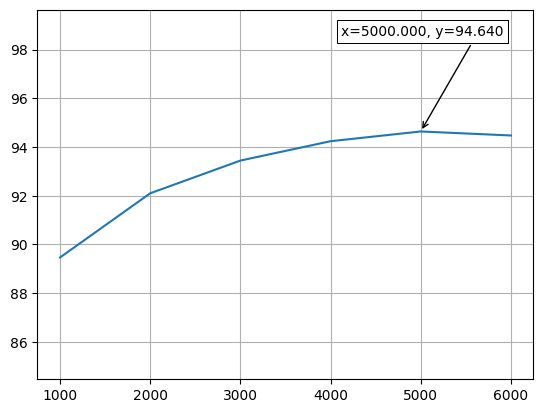

Maximum accuracy achived is = 94.64%, for N = 5000

time: 7min 22s (started: 2023-05-09 08:53:50 +00:00)


In [ ]:
# Calling interation_over_n() function to plot accuracies from N =1000 to 6000 with Jump of 1000
iteration_over_n(1000,6001,1000,X,y)

## **11.2 Iterating from 4000 to 6000 with leap of 100**

Iterating from N = 4000 to N = 6001 with jump of 100

Training Started for N = 4000
Training Started for N = 4100
Training Started for N = 4200
Training Started for N = 4300
Training Started for N = 4400
Training Started for N = 4500
Training Started for N = 4600
Training Started for N = 4700
Training Started for N = 4800
Training Started for N = 4900
Training Started for N = 5000
Training Started for N = 5100
Training Started for N = 5200
Training Started for N = 5300
Training Started for N = 5400
Training Started for N = 5500
Training Started for N = 5600
Training Started for N = 5700
Training Started for N = 5800
Training Started for N = 5900
Training Started for N = 6000


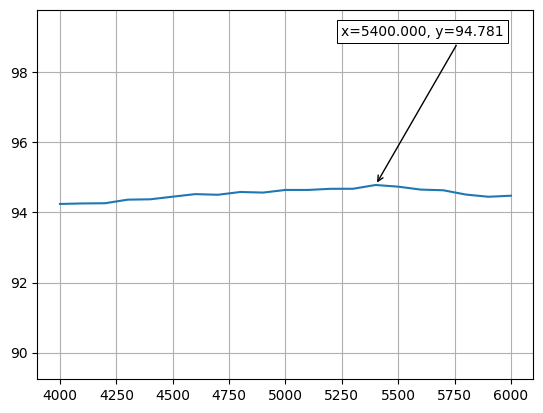

Maximum accuracy achived is = 94.78125%, for N = 5400

time: 26min 23s (started: 2023-05-09 09:01:12 +00:00)


In [ ]:
# Calling interation_over_n() function to plot accuracies from N =4000 to 6000 with Jump of 100
iteration_over_n(4000,6001,100,X,y)

## **11.3 Iterating from 5000 to 6000 with leap of 10**

Iterating from N = 5000 to N = 6001 with jump of 10

Training Started for N = 5000
Training Started for N = 5010
Training Started for N = 5020
Training Started for N = 5030
Training Started for N = 5040
Training Started for N = 5050
Training Started for N = 5060
Training Started for N = 5070
Training Started for N = 5080
Training Started for N = 5090
Training Started for N = 5100
Training Started for N = 5110
Training Started for N = 5120
Training Started for N = 5130
Training Started for N = 5140
Training Started for N = 5150
Training Started for N = 5160
Training Started for N = 5170
Training Started for N = 5180
Training Started for N = 5190
Training Started for N = 5200
Training Started for N = 5210
Training Started for N = 5220
Training Started for N = 5230
Training Started for N = 5240
Training Started for N = 5250
Training Started for N = 5260
Training Started for N = 5270
Training Started for N = 5280
Training Started for N = 5290
Training Started for N = 5300
Training Started 

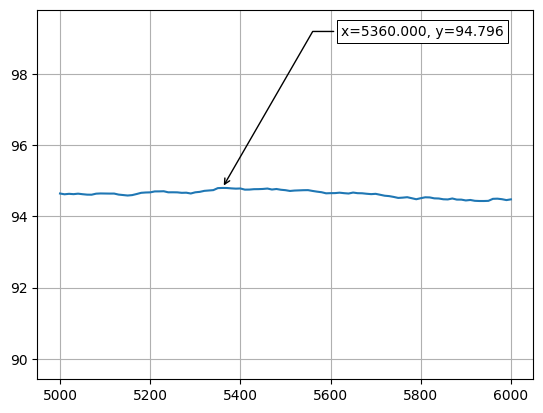

Maximum accuracy achived is = 94.79585618525289%, for N = 5360

time: 1h 48min 12s (started: 2023-05-09 09:27:35 +00:00)


In [ ]:
# Calling interation_over_n() function to plot accuracies from N =5000 to 6000 with Jump of 10
iteration_over_n(5000,6001,10,X,y)

## **11.4 Iterating from 5300 to 5400 with leap of 1**

Iterating from N = 5300 to N = 5401 with jump of 1

Training Started for N = 5300
Training Started for N = 5301
Training Started for N = 5302
Training Started for N = 5303
Training Started for N = 5304
Training Started for N = 5305
Training Started for N = 5306
Training Started for N = 5307
Training Started for N = 5308
Training Started for N = 5309
Training Started for N = 5310
Training Started for N = 5311
Training Started for N = 5312
Training Started for N = 5313
Training Started for N = 5314
Training Started for N = 5315
Training Started for N = 5316
Training Started for N = 5317
Training Started for N = 5318
Training Started for N = 5319
Training Started for N = 5320
Training Started for N = 5321
Training Started for N = 5322
Training Started for N = 5323
Training Started for N = 5324
Training Started for N = 5325
Training Started for N = 5326
Training Started for N = 5327
Training Started for N = 5328
Training Started for N = 5329
Training Started for N = 5330
Training Started f

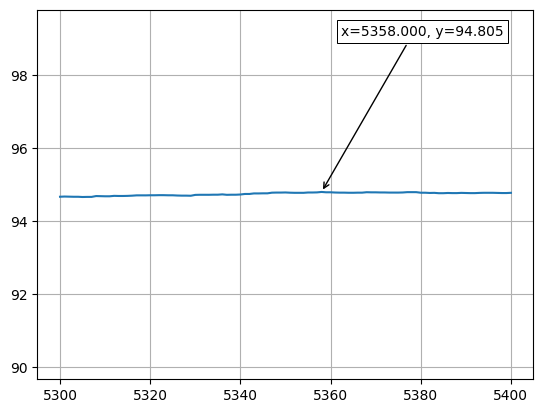

Maximum accuracy achived is = 94.80511571254567%, for N = 5358

time: 1h 55min 4s (started: 2023-05-09 11:15:48 +00:00)


In [ ]:
# Calling interation_over_n() function to plot accuracies from N =5300 to 5400 with Jump of 1
iteration_over_n(5300,5401,1,X,y)

# **12. Plotting Confusion Matrix and Class Wise accuracy of optimal value of N(5358)**

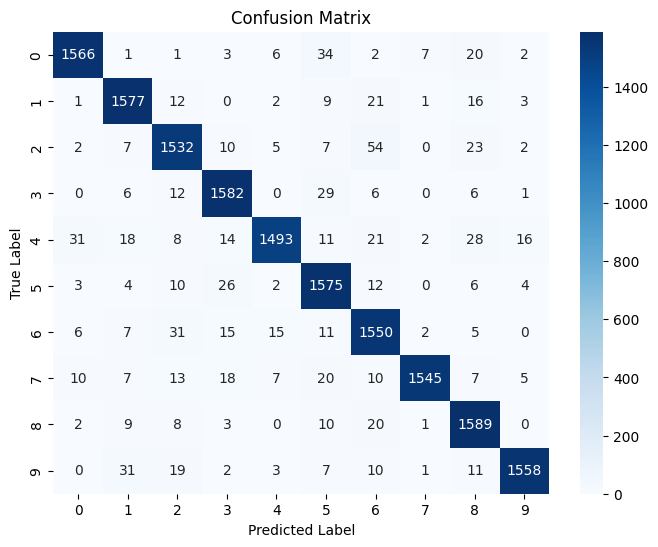

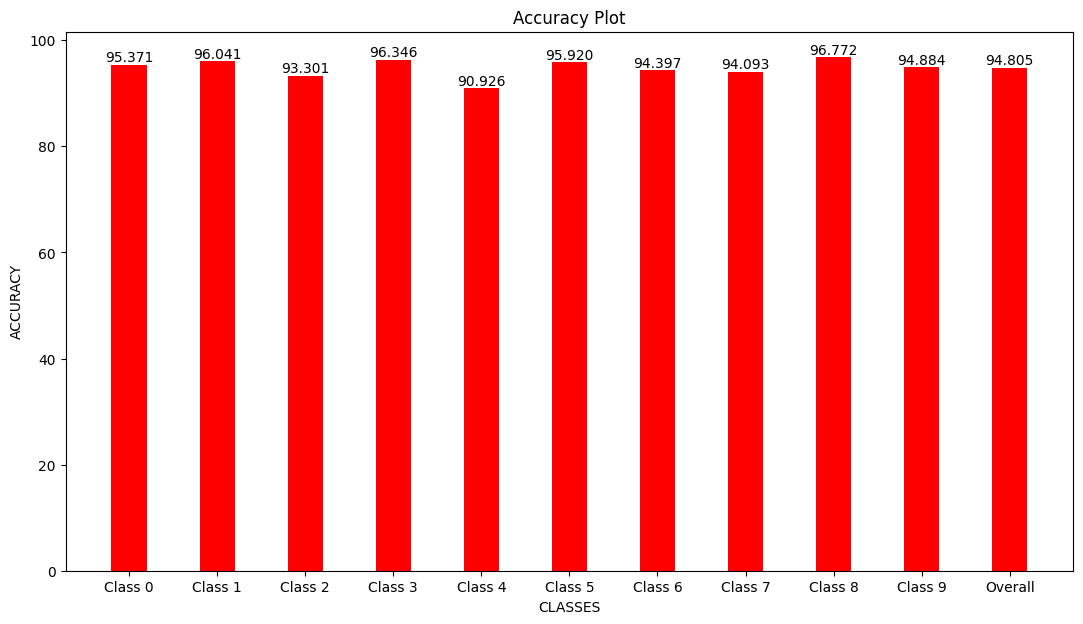

time: 1min 24s (started: 2023-05-10 00:57:09 +00:00)


In [ ]:
# Calling split function to split data using optimal value of N = 5358
X_train, X_test, y_train, y_test = split(X,y,5358)

# Calling knn_model() function to run KNN ML model
acc, test_pred = knn_model(X_train, X_test, y_train, y_test)

# Calling con_mat() function to plot Confusion Matrix
cm = con_mat(y_test,test_pred,colour='Blues')

# Calling class_wise_accuracy() to plot class wise accuracy bar plot
class_wise_accuracy(cm,acc,colour='red')

# **13. RUNNING KNN ON PCA, kPCA AND MDS TRANSFORMED DATASETS AND PLOTTING ACCURACY**

## **13.1 PCA**

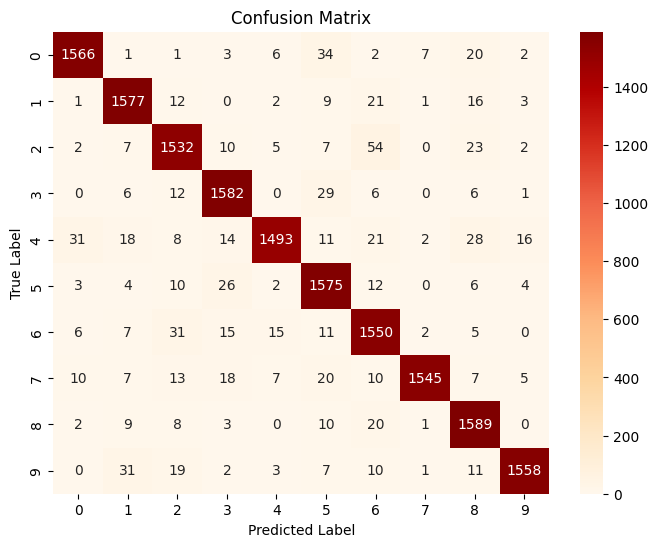

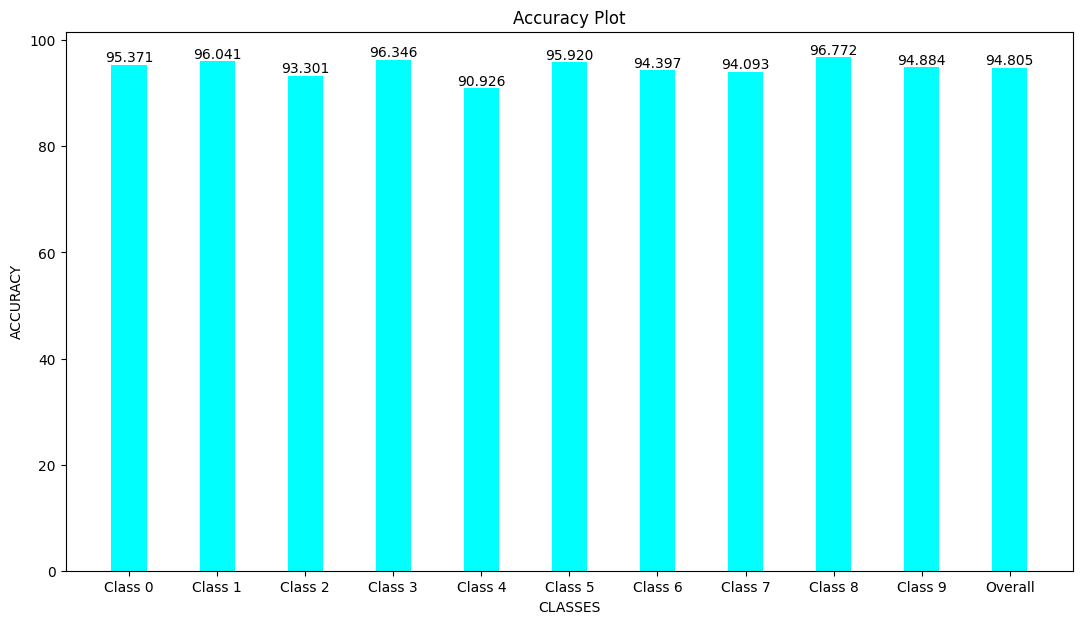

time: 1min (started: 2023-05-10 00:58:33 +00:00)


In [ ]:
# Converting PCA transformed dataset to Pandas DataFrame
pd_X_pca = pd.DataFrame(X_pca)

# Calling split function to split data using optimal value of N = 5358
X_train, X_test, y_train, y_test = split(pd_X_pca,y,5358)

# Calling knn_model() function to run KNN ML model
acc, test_pred = knn_model(X_train, X_test, y_train, y_test)

# Calling con_mat() function to plot Confusion Matrix
cm = con_mat(y_test,test_pred,True,'OrRd')

# Calling class_wise_accuracy() to plot class wise accuracy bar plot
class_wise_accuracy(cm,acc,colour='cyan')

## **13.2 Kernel PCA**

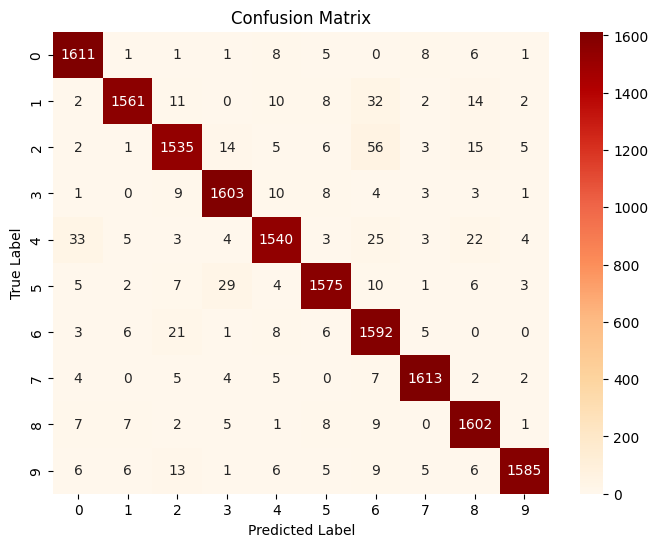

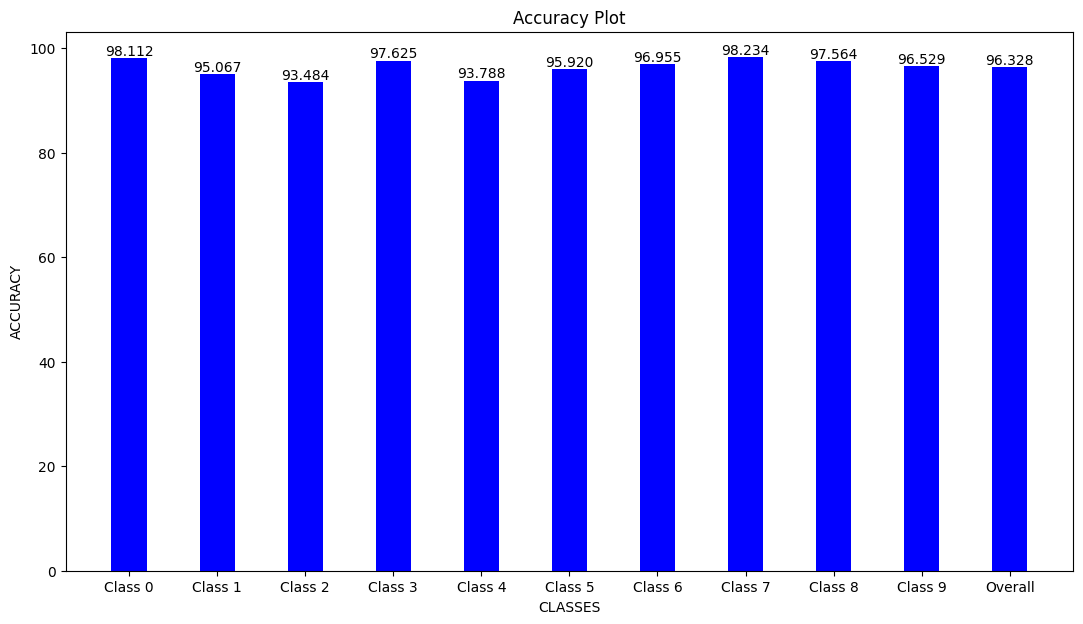

time: 1min 2s (started: 2023-05-10 00:59:34 +00:00)


In [ ]:
# Converting Kernel PCA transformed dataset to Pandas DataFrame
pd_X_kpca = pd.DataFrame(X_kpca)

# Calling split function to split data using optimal value of N = 5358
X_train, X_test, y_train, y_test = split(pd_X_kpca,y,5358)

# Calling knn_model() function to run KNN ML model
acc, test_pred = knn_model(X_train, X_test, y_train, y_test)

# Calling con_mat() function to plot Confusion Matrix
cm = con_mat(y_test,test_pred,True,'OrRd')

# Calling class_wise_accuracy() to plot class wise accuracy bar plot
class_wise_accuracy(cm,acc,'blue')

## **13.3 MDS**

In [ ]:
# Converting MDS transformed dataset to Pandas DataFrame
pd_X_mds = pd.DataFrame(X_mds)
pd_y_s = pd.DataFrame(y_s)
pd_y_s = pd_y_s.set_axis(['Labels'], axis=1, inplace=False)

# Calling split function to split data using optimal value of N = 5358
X_train, X_test, y_train, y_test = split(pd_X_mds,pd_y_s,5358)

# Calling knn_model() function to run KNN ML model
acc, test_pred = knn_model(X_train, X_test, y_train, y_test)

# Calling con_mat() function to plot Confusion Matrix
cm = con_mat(y_test,test_pred,True)

# Calling class_wise_accuracy() to plot class wise accuracy bar plot
class_wise_accuracy(cm,acc)

# **14. ADVANCING WITH KERNEL PCA TO FIND ALL OTHER OPTIMAL PARAMETERS**

## **14.1 Looping over no. of components in KernelPCA from 2 to 150**

In [ ]:
# Initialising empty list to store accuracies and n_component values
accuracy=[]
i_list=[]

#Runn forloop from 2 to 150
for i in range(2,151):

  # Printing the value of n_component on which loop is running
  print(i)

  # Calling kernel_pca() function to fit and transformed Dataset with n_componenets=i where i = [2, 3, 4, .... , 148, 149, 150]
  kpca2,X_kpca2 = kernel_pca(X_s, y_s, i, False)

  # Converting Kernel PCA transformed dataset to Pandas DataFrame
  pd_X_kpca2 = pd.DataFrame(X_kpca2)

  # Calling split function to split data using optimal value of N = 5358
  X_train, X_test, y_train, y_test = split(pd_X_kpca2,y,5358)

  # Calling knn_model() function to train KNN Classification Model
  acc, test_pred = knn_model(X_train, X_test, y_train, y_test)

  # Adding accuracy and corresponding no of components value to list
  accuracy.append(acc)
  i_list.append(i)

# Calling iteration_graph() to plot accuracy plot
iteration_graph(i_list,accuracy)

print(f'Maximum accuracy achived is = {max(accuracy)}%, for N = {i_list[accuracy.index(max(accuracy))]}\n')

## **14.2 Looping over no. of components in PCA from 2 to 150**

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150


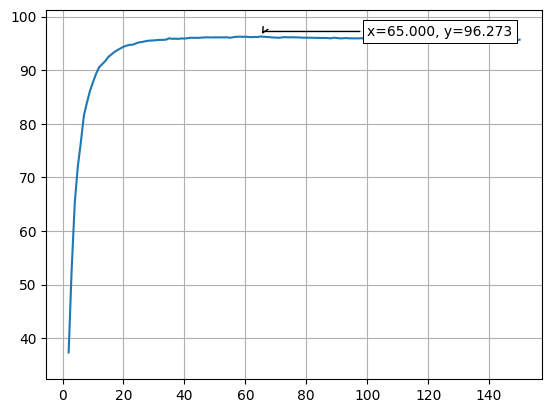

Maximum accuracy achived is = 96.27283800243606%, for N = 65

time: 25min 46s (started: 2023-05-09 21:13:10 +00:00)


In [ ]:
# Initialising empty list to store accuracies and n_component values
accuracy=[]
i_list=[]

#Runn forloop from 2 to 150
for i in range(2,151):

  # Printing the value of n_component on which loop is running
  print(i)

  # Calling kernel_pca() function to fit and transformed Dataset with n_componenets=i where i = [2, 3, 4, .... , 148, 149, 150]
  pca2,X_pca2 = p_c_a(X_s, y_s, i, False)

  # Converting Kernel PCA transformed dataset to Pandas DataFrame
  pd_X_pca2 = pd.DataFrame(X_pca2)

  # Calling split function to split data using optimal value of N = 5358
  X_train, X_test, y_train, y_test = split(pd_X_pca2,y,5358)

  # Calling knn_model() function to train KNN Classification Model
  acc, test_pred = knn_model(X_train, X_test, y_train, y_test)

  # Adding accuracy and corresponding no of components value to list
  accuracy.append(acc)
  i_list.append(i)

# Calling iteration_graph() to plot accuracy plot
iteration_graph(i_list,accuracy)

print(f'Maximum accuracy achived is = {max(accuracy)}%, for N = {i_list[accuracy.index(max(accuracy))]}\n')

## **14.3 Looping over number of neighbors in kNN from 1 to 50**

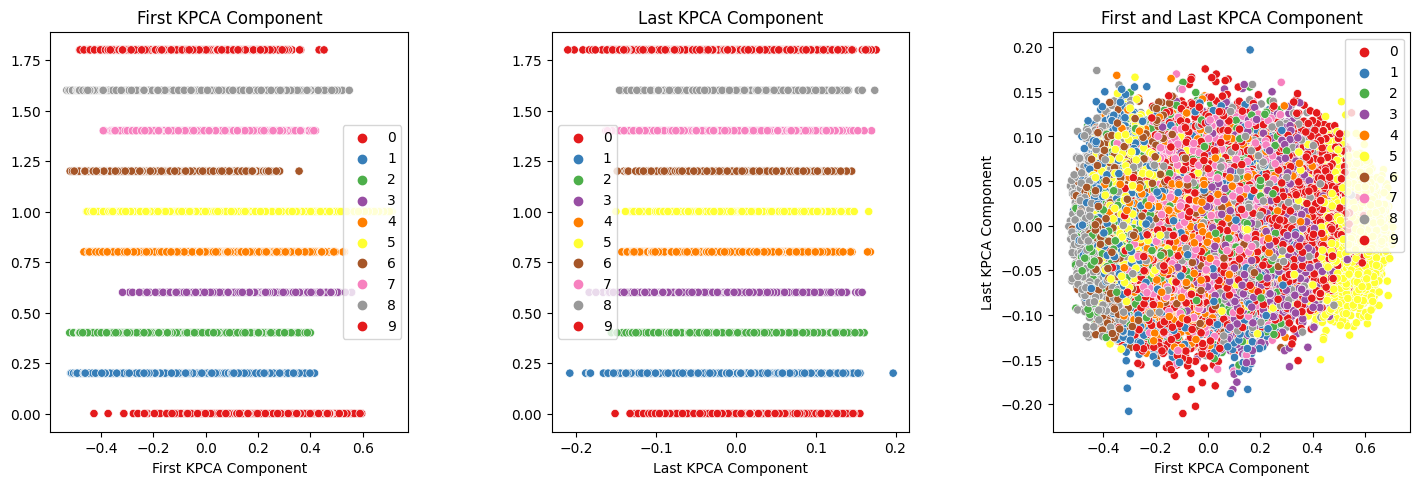

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


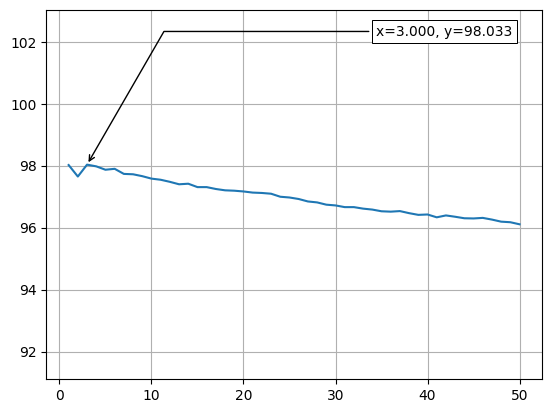

Maximum accuracy achived is = 98.03288672350791%, for N = 3

time: 7min 42s (started: 2023-05-09 13:51:57 +00:00)


In [ ]:
# Calling kernel_pca() function to fit and transformed Dataset with n_componenets=72
kpca2,X_kpca2 = kernel_pca(X_s, y_s, 72, True)

# Converting Kernel PCA transformed dataset to Pandas DataFrame
pd_X_kpca2 = pd.DataFrame(X_kpca2)

# Initialising empty list to store accuracies and no of neighbors values
accuracy=[]
k_list=[]

#Running forloop from 1 to 50
for i in range(1,51):

  # Printing the value of no of neighbor on which loop is running
  print(i)

  # Calling split function to split data using optimal value of N = 5358
  X_train, X_test, y_train, y_test = split(pd_X_kpca2,y,5358)

  # Calling knn_model() function to train KNN Classification Model with no of neighbors = i, where i = [1, 2, 3, .... , 49, 50]
  acc, test_pred = knn_model(X_train, X_test, y_train, y_test,i)

  # Adding accuracy and corresponding no of neighbors value to list
  accuracy.append(acc)
  k_list.append(i)

# Calling iteration_graph() to plot accuracy plot
iteration_graph(k_list,accuracy)
print(f'Maximum accuracy achived is = {max(accuracy)}%, for N = {k_list[accuracy.index(max(accuracy))]}\n')

# **15. RUNNING CLASSIFICATION MODEL AND PLOTTING CONFUSION MATRIX AND ACCURACIES USING ALL THE DERIVED OPTIMAL VALUES**

*   Kernel PCA(n_components = 72, kernel = 'cosine')
*   N = 5358
*   kNN(n_neighbours = 3)












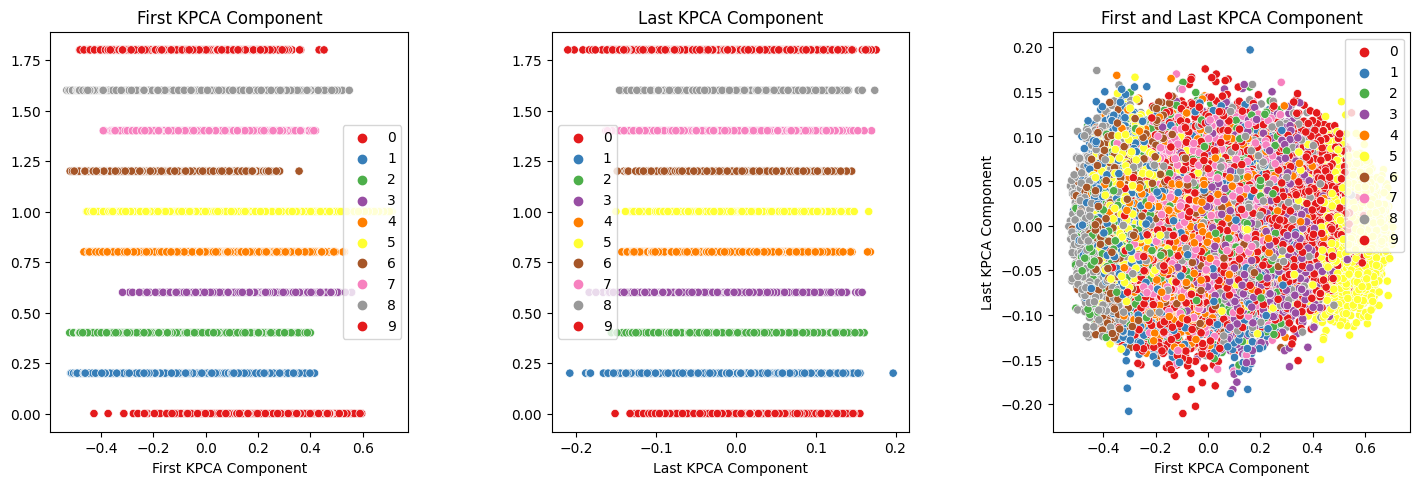

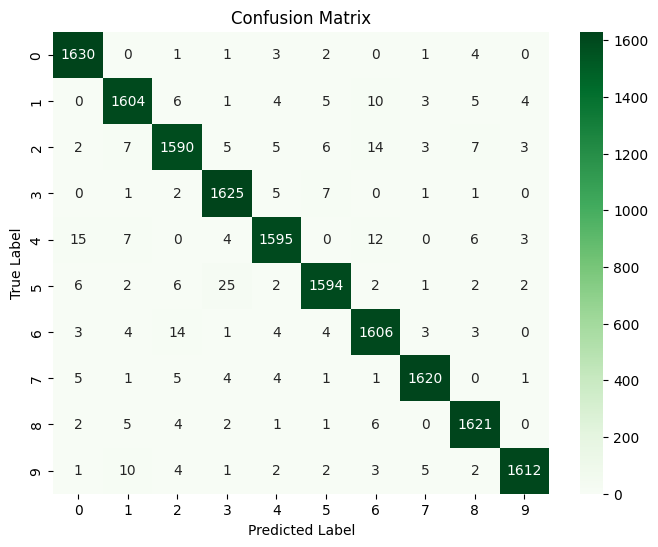

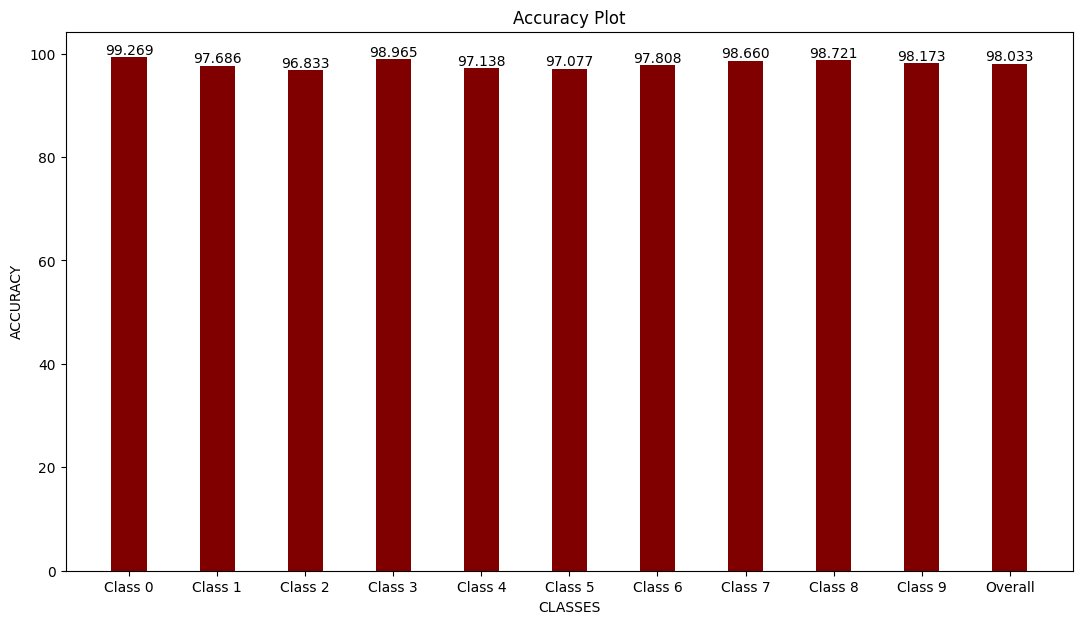

time: 30.7 s (started: 2023-05-10 01:00:36 +00:00)


In [ ]:
# Calling kernel_pca() function to fit and transformed Dataset with n_componenets=72
kpca2,X_kpca2 = kernel_pca(X_s, y_s, 72, True)

# Converting Kernel PCA transformed dataset to Pandas DataFrame
pd_X_kpca2 = pd.DataFrame(X_kpca2)

# Calling split function to split data using optimal value of N = 5358
X_train, X_test, y_train, y_test = split(pd_X_kpca2,y,5358)

# Calling knn_model() function to train KNN Classification Model with k = 3
acc, test_pred = knn_model(X_train, X_test, y_train, y_test,3)

# Calling con_mat() function to plot Confusion Matrix
cm = con_mat(y_test,test_pred)

# Calling class_wise_accuracy function to plot accuracy bar plot
class_wise_accuracy(cm,acc)

# **16 PRINTING THE RUNTIME OF THE ENTIRE .IPYNB FILE**

In [ ]:
end_time=datetime.now()
total_time = end_time - start_time
print(f'Time taken by the entire file to run in a single go is {total_time}')

Time taken by the entire file to run in a single go is 0:05:17.610681
time: 751 µs (started: 2023-05-10 01:01:07 +00:00)
